In [420]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt

In [421]:
url = "https://www.getmidas.com/canli-borsa/xu100-bist-100-hisseleri"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [422]:
data = soup.find_all("table", class_ = "stock-table w-100")

In [423]:
stock_table = data[0].contents[len(data[0].contents) - 2]

In [424]:
stock_table = stock_table.find_all("tr")

In [425]:
companies_data = []

In [426]:
def clean_price(price_str):
    if (price_str == "-"): return None
    return float(price_str.strip().replace(" ", "").replace(".", "").replace(",", "."))

for stock in stock_table:
    stock_info = {}
    columns = stock.find_all("td", class_="val")
    stock_info["Stock"] = stock.find("a", class_="title stock-code").text
    stock_info["Last"] = clean_price(columns[1].text)
    stock_info["Buying"] = clean_price(columns[2].text)
    stock_info["Selling"] = clean_price(columns[3].text)
    stock_info["Diff"] = float(columns[4].text.strip().replace(" ", "").replace(",", ".").strip('%'))
    stock_info["Lowest"] = clean_price(columns[5].text)
    stock_info["Highest"] = clean_price(columns[6].text)
    stock_info["WAP"] = clean_price(columns[7].text)
    volume_str = columns[8].text.strip().replace(" ", "").replace(",", "")
    volume_int = int(volume_str.replace(".", ""))
    stock_info["Volume"] = volume_int
    companies_data.append(stock_info)

In [427]:
df = pd.DataFrame(companies_data)
print(df.head())

   Stock    Last  Buying  Selling  Diff  Lowest  Highest     WAP        Volume
0  AEFES  153.50  153.30   153.50  2.74  147.50   153.50  151.13   81861564010
1  AGHOL  237.30  237.30   237.40  0.72  233.20   238.60  235.60   22507143010
2  AHGAZ   13.11   13.11    13.12 -1.43   13.06    13.36   13.18   15328931553
3  AKBNK   40.22   40.22    40.24  2.45   39.72    40.48   40.24  426685944884
4  AKCNS  179.50  179.10   179.50 -0.28  176.50   182.50  179.90   11541437530


In [428]:
df.describe()

,Last,Buying,Selling,Diff,Lowest,Highest,WAP,Volume
count,100.000000,100.000000,99.000000,100.000000,100.000000,100.00000,100.000000,1.000000e+02
mean,363.490100,363.456100,366.863939,1.107900,354.230300,371.98050,364.647800,1.055266e+11
std,1570.255304,1570.254932,1578.510419,1.817178,1518.988085,1612.72879,1576.975108,1.703251e+11
min,4.030000,4.030000,4.040000,-2.160000,4.020000,4.05000,4.030000,8.318142e+09
25%,21.115000,21.095000,20.870000,-0.212500,20.840000,21.25500,21.045000,2.429680e+10
50%,50.000000,49.990000,50.050000,1.055000,49.180000,50.32500,49.930000,5.881070e+10
75%,152.000000,151.875000,152.500000,2.170000,148.325000,154.07500,151.617500,9.647476e+10
max,13197.500000,13197.500000,13200.000000,10.000000,12632.500000,13475.00000,13181.180000,1.402079e+12


In [429]:
sorted_volume = df.sort_values(ascending=False, by= "Volume")
sorted_volume.head(10)

,Stock,Last,Buying,Selling,Diff,Lowest,Highest,WAP,Volume
85,THYAO,289.25,289.00,289.25,2.75,282.50,290.25,286.22,1402079244275
76,SASA,39.10,39.10,39.12,3.88,37.40,39.94,38.83,539318567262
97,YKBNK,22.68,22.68,22.70,1.80,22.56,23.16,22.88,471080196334
3,AKBNK,40.22,40.22,40.24,2.45,39.72,40.48,40.24,426685944884
36,EREGL,43.52,43.52,43.54,0.14,43.42,44.04,43.70,384836029426
47,ISCTR,25.86,25.86,25.88,1.17,25.62,26.30,26.02,363435795546
12,ASELS,52.35,52.35,52.40,2.35,51.15,52.65,52.09,333122794090
92,TUPRS,155.10,155.10,155.20,-0.13,154.30,157.50,155.86,323737988100
14,ASTOR,125.60,125.60,125.70,1.29,124.00,127.80,125.89,319793752890
75,SAHOL,76.55,76.55,76.60,-1.10,76.00,78.35,76.94,313688544035


In [430]:
sorted_diff = df.sort_values(ascending=False, by = "Diff")

In [431]:
top_10 = sorted_diff.head(10)
top_10

,Stock,Last,Buying,Selling,Diff,Lowest,Highest,WAP,Volume
67,MIATK,49.72,49.72,NaN,10.00,45.08,49.72,48.23,201578694870
24,CCOLA,590.00,589.50,590.00,7.08,548.00,593.50,573.94,75409563000
10,ALFAS,106.80,106.70,106.80,5.01,101.10,108.80,105.05,131170497140
5,AKFYE,20.38,20.36,20.38,4.51,19.51,20.44,20.13,28721969549
66,MGROS,438.00,437.75,438.00,3.91,419.25,438.00,427.02,75066484550
76,SASA,39.10,39.10,39.12,3.88,37.40,39.94,38.83,539318567262
31,EGEEN,13197.50,13197.50,13200.00,3.53,12632.50,13475.00,13181.18,74880951500
77,SDTTR,386.50,386.50,386.75,3.34,370.50,400.00,387.40,80466827625
9,ALBRK,4.37,4.36,4.37,3.31,4.26,4.39,4.33,12810719210
8,ALARK,113.20,113.20,113.30,3.10,108.80,115.20,112.43,91842828800


In [432]:
top_10["Stock"]

67    MIATK
24    CCOLA
10    ALFAS
5     AKFYE
66    MGROS
76     SASA
31    EGEEN
77    SDTTR
9     ALBRK
8     ALARK
Name: Stock, dtype: object

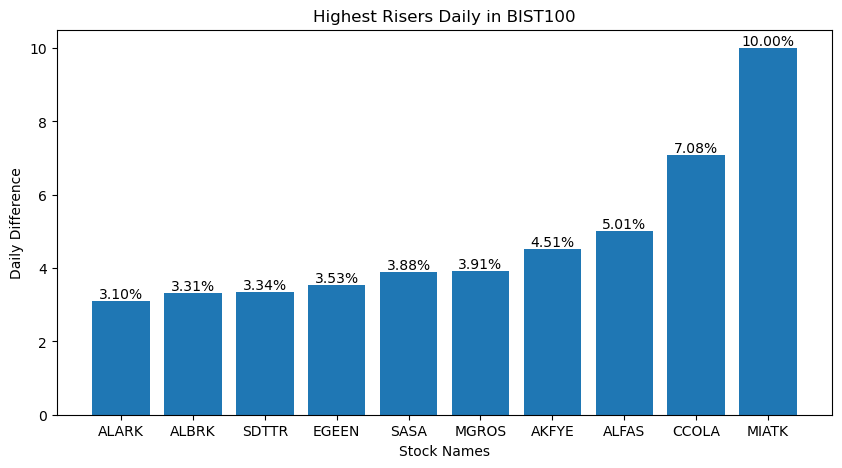

In [433]:
fig, ax = plt.subplots(figsize=(10, 5))
top_10_sorted = top_10.sort_values(by="Diff")
bars = ax.bar(top_10_sorted["Stock"], top_10_sorted["Diff"])

plt.title("Highest Risers Daily in BIST100")
plt.xlabel("Stock Names")
plt.ylabel("Daily Difference")

# Let's add the percentage value according to the height of each bar
for bar in bars:
    diff = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, diff, f'{diff:.2f}%', ha='center', va='bottom')

plt.show()


In [434]:
top_10_sorted

,Stock,Last,Buying,Selling,Diff,Lowest,Highest,WAP,Volume
8,ALARK,113.20,113.20,113.30,3.10,108.80,115.20,112.43,91842828800
9,ALBRK,4.37,4.36,4.37,3.31,4.26,4.39,4.33,12810719210
77,SDTTR,386.50,386.50,386.75,3.34,370.50,400.00,387.40,80466827625
31,EGEEN,13197.50,13197.50,13200.00,3.53,12632.50,13475.00,13181.18,74880951500
76,SASA,39.10,39.10,39.12,3.88,37.40,39.94,38.83,539318567262
66,MGROS,438.00,437.75,438.00,3.91,419.25,438.00,427.02,75066484550
5,AKFYE,20.38,20.36,20.38,4.51,19.51,20.44,20.13,28721969549
10,ALFAS,106.80,106.70,106.80,5.01,101.10,108.80,105.05,131170497140
24,CCOLA,590.00,589.50,590.00,7.08,548.00,593.50,573.94,75409563000
67,MIATK,49.72,49.72,NaN,10.00,45.08,49.72,48.23,201578694870


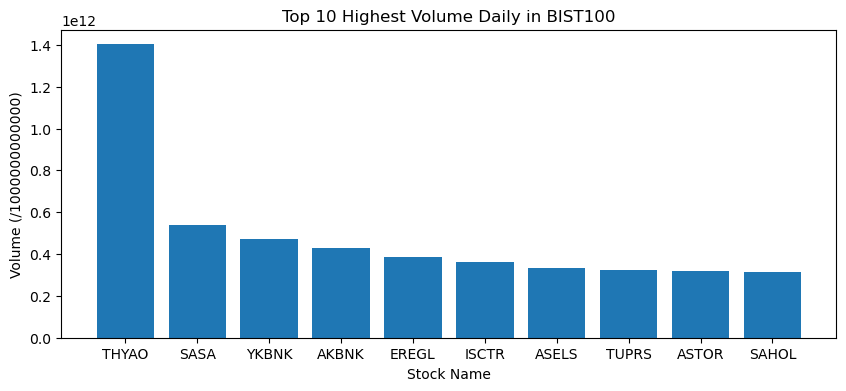

In [435]:
fig = plt.figure(figsize = (10,4))
plt.bar(sorted_volume["Stock"].head(10), sorted_volume["Volume"].head(10))
plt.title("Top 10 Highest Volume Daily in BIST100")
plt.xlabel("Stock Name")
plt.ylabel("Volume (/1000000000000)")
plt.show()


In [436]:
top10_highest_price_stock = df.sort_values(ascending = False, by = "Last").head(10)

In [437]:
top10_highest_price_stock

,Stock,Last,Buying,Selling,Diff,Lowest,Highest,WAP,Volume
31,EGEEN,13197.5,13197.50,13200.0,3.53,12632.50,13475.0,13181.18,74880951500
60,KONYA,8400.0,8400.00,8405.0,-0.56,8312.50,8752.5,8547.64,34285438500
21,BRYAT,2817.5,2817.50,2825.0,-0.44,2807.50,2900.0,2845.20,27800972250
39,FROTO,913.5,913.50,914.0,1.73,896.00,918.0,910.36,86315589750
90,TTRAK,845.0,844.50,845.0,2.74,817.50,855.0,839.66,60746691850
73,PGSUS,786.0,786.00,786.5,2.41,769.50,787.0,780.63,249651273350
20,BRSAN,628.5,628.50,629.0,-0.79,628.50,646.0,635.81,87820890650
24,CCOLA,590.0,589.50,590.0,7.08,548.00,593.5,573.94,75409563000
69,OTKAR,498.0,497.75,498.0,1.53,487.50,500.0,495.52,9807542750
66,MGROS,438.0,437.75,438.0,3.91,419.25,438.0,427.02,75066484550


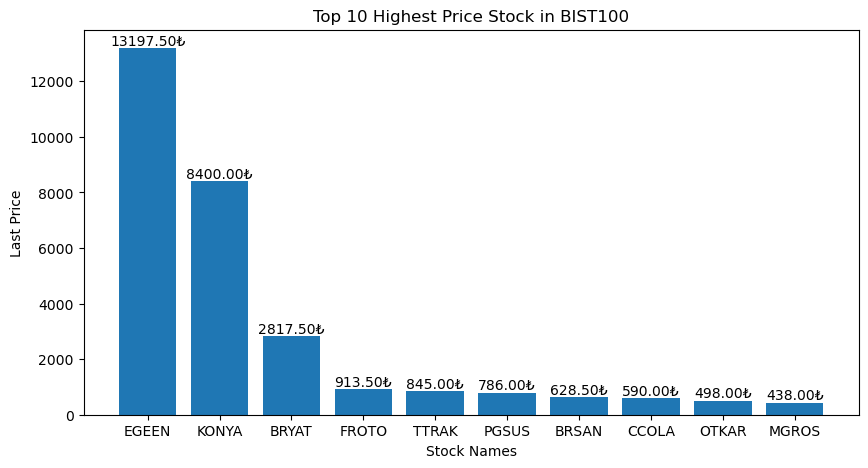

In [438]:
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(top10_highest_price_stock["Stock"], top10_highest_price_stock["Last"])

plt.title("Top 10 Highest Price Stock in BIST100")
plt.xlabel("Stock Names")
plt.ylabel("Last Price")

# Let's add the percentage value according to the height of each bar
for bar in bars:
    diff = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, diff, f'{diff:.2f}₺', ha='center', va='bottom')

plt.show()